# PGandE Power Outage Analysis

### September 2019

## Instructions

1. Install [Jupyter](https://jupyter.org/install) from the command line or with the [Anaconda](https://www.anaconda.com/distribution/) application
2. Verify that Jupyter Notebook was installed; it should start by running `jupyter notebook` from the command line or be visible from Windows Start menu
3. Start Jupyter Notebook; save this notebook and CSV data to your "Documents" folder and navigate to it from the Notebook start page
4. Open this notebook from the start page; file and cells should be viewable

## Introduction

This tutorial demonstrates basic Notebook functionality, Python code required to run examples and features for analysis and visualization. It will require some basic understanding of the Python programming language, Jupyter platform and data analysis; however, we will work through these steps in each section so not to worry! After this tutorial, you should have a basic understanding of Notebook, Python and how to get started with your own notebook.

This tutorial focuses on Exploratory Data Analysis (EDA) of PGandE power outage dataset from the [latest snapshot](https://pge-outages.simonwillison.net/pge-outages/most_recent_snapshot). Description and details about the dataset are available [here](https://pge-outages.simonwillison.net/).

Citation: This notebook is based on this Medium article [tutorial](https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190) and [Github Repo](https://github.com/kadnan/EDA_Python/).

## Notebooks for Collaboration

Notebook is a powerful collaborative tool which is open-source and light-weight. It provides all the tools necessary to run data analysis, visualization, statistics and data science [out of the box](https://jupyter.org/jupyter-book/01/what-is-data-science.html). In addition, it's gained acceptance from industry and academia for collaborating on projects and publishing work.

Notebook is a combination of text and code with the programming run-time built into the platform so there is no need to install additional software. The text is in the markdown file format (similar to HTML), and code supports several languages. It is organized by cells which can consist of either text or code; placed together, they can be sent as a single document to share/publish work.

## The Python Programming Language

This tutorial will cover some basic programming, so we will focus on learning the Python programming language for this notebook since it is widely used in industry and has even gained enough traction to be taught in [high school](https://codehs.com/info/curriculum/intropython) and AP Computer Science [courses](https://code.org/educate/curriculum/high-school).

[Notebook](https://jupyter.org/) supports several different languages (R, Scala and Julia); however, Python is the most popular of them and can be used for other tasks, primarily data science and web programming.

## Exercises

If you are new to Jupyter Notebook, then please review the links below:

1. [Intro Guide - DataQuest](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
2. [Intro Guide - DataCamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
3. [Notebook Intro - Medium](https://towardsdatascience.com/a-beginners-tutorial-to-jupyter-notebooks-1b2f8705888a)
4. [Data Science Tutorial](https://jupyter.org/jupyter-book/01/what-is-data-science.html)

If you are new to programming or Python, then please review the links below:

1. [Quick Start](https://www.python.org/about/gettingstarted/)
2. [Intro Tutorials](https://realpython.com/learning-paths/python3-introduction/)
3. [Free Code Camp Guide](https://guide.freecodecamp.org/python/)

If you are new to programming or Markdown, then please review the links below:

1. [Quick Start - Github](https://guides.github.com/features/mastering-markdown/)
2. [Quick Start Guide](https://www.markdownguide.org/getting-started/)
3. [Quick Start Tutorial](https://www.markdowntutorial.com/)


## Section 1 - Notebook, Python and Modules

## Open-Source Software (OSS)

Notebook and Python are [open-source software](https://en.wikipedia.org/wiki/Open-source_software) tools, meaning that they are developed and maintained by an open community of contributors instead of closed-source software which is closed to outside development (e.g. Oracle, Apple, Adobe, etc.).

Although opinions abound about which is better, it seems intuitive that a software project would be more robust having more pairs of eyes on it (community) instead of one focused team of developers (closed-source). Many large tech companies such as Google, Amazon and Microsoft recognize this trend so have adopted a [hybrid approach](https://www.wired.com/story/wired-guide-open-source-software/) of basing their products on open-source software.

That said, Notebook and Python are open for public code contributions (with approval by core development team) and have an entire ecosystem of open-source libraries available for use within this notebook via Python modules.

## Exercises

If you are new to Python modules, then please review the links below:

* [Intro to Modules](https://realpython.com/python-modules-packages/)
* [Modules vs. Packages](https://realpython.com/python-modules-packages/)

Please run code cell below with the "run" button located in the top menu.

*Note: If you run into errors, you may need to install a missing module; e.g. [Seaborn](https://seaborn.pydata.org/installing.html) is not included in Anaconda by default.*

In [1]:
# 01 - load Python modules into notebook for later use

# Pandas modules for working with DataFrames
import pandas as pd

# Numpy module for scientific computing (math functions, and Pandas is built on Numpy)
import numpy as np

# Modules for statistical models
import scipy
from scipy import stats
import statsmodels.api as sm

# Modules for data visualization
import matplotlib.pyplot as plt

# Adjust plot settings to output correctly
%matplotlib inline

# Seaborn module for plots; built on Matplotlib package:
# https://seaborn.pydata.org/
import seaborn as sns; sns.set(color_codes=True)

# Set numeric output; turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Suppress warning 
import warnings
warnings.filterwarnings('ignore')

print('module download completed!')


module download completed!


## Section 2 - Data Validation

## Python DataFrames

Rather than manually editing and saving spreadsheets, what if there were a tool that could save all those steps, allow for collaboration and make it easy to share/publish your work? Yes, a database could do such a task but how about one which can combine text, publish in multiple formats (pdf, latex, html) and perform data science in a human-readable programming language such as Python? (Sorry, SQL!)

Well, this notebook is that tool and Python DataFrames (via the Pandas module) are the way by which to transform data without having to worry about whether your application (i.e. Excel) will crash and corrupt your source file when working with large datasets.

The links below will provide additional info but in general, data tables are loaded into the notebook and stored as DataFrames and assigned as variables which are like sheets within an Excel file. DataFrames can then be joined, manipulated and transformed programmatically. Rather than linking across a spreadsheet which can become complex and unsustainable over time, DataFrames can be managed and cleaned with organized code (e.g. cells within this notebook).

## Exercises

If you are new to DataFrames, then please review the links below:

* [Intro to DataFrames](https://databricks.com/glossary/what-are-dataframes)
* [DataFrames - DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
* [Data Science Notes](https://chrisalbon.com/)

Please run code cells below with the "run" button located in the top menu. Cells will show the following:

* Read in data into a DataFrame
* Convert data type within a DataFrame column
* Print first 5 rows of DataFrame
* Describe the dataset with summary statistics

In [2]:
# 02A - Load data into notebook

# load data into notebook; make sure file is in folder as notebook
df = pd.read_csv('most_recent_snapshot.csv')

print('*** Dataset Profile ***')
print('')

print('Column Data Types:')
print(df.dtypes)
print('')

print('Dataset Dimensions:')
print(df.shape)
print('')

print('Unique Values - region:')
print(df['region'].unique())
print('')

print('Unique Values - cause:')
print(df['cause'].unique())
print('')

# Print out first 5 lines of dataset below
print('First 5 Rows of Dataset:')
print('')
print(df.head(5))

# drop null values
# df = df.dropna()


*** Dataset Profile ***

Column Data Types:
id                    object
latitude             float64
longitude            float64
outage                 int64
estCustAffected        int64
lastUpdateTime         int64
hazardFlag             int64
region                object
cause                 object
crewCurrentStatus     object
outage_url            object
currentEtor            int64
autoEtor             float64
dtype: object

Dataset Dimensions:
(149, 13)

Unique Values - region:
['Albion' 'Alleghany' 'Arroyo Grande' 'Bethel Island' 'Bonny Doon'
 'Boulder Creek' 'Bradley' 'Brookdale' 'Byron' 'Cambria' 'Capitola'
 'Caribou' 'Carmel' 'Castro Valley' 'Cherryland' 'Clearlake' 'Clovis'
 'Colfax' 'Creston' 'Danville' 'Deer Park' 'Dixon' 'El Dorado' 'El Verano'
 'Elk Creek' 'Emeryville' 'Fairfax' 'Felton' 'Ferndale' 'Foresthill'
 'Fremont' 'Fresno' 'Garberville' 'Garden Valley' 'Geyserville' 'Gilroy'
 'Glenn' 'Grass Valley' 'Greenville' 'Gualala' 'Hanford' 'Hayward'
 'Humboldt Hill' 'Ke

In [3]:
# 02B - Summary statistics

# Output summary statistics for dataframe
print('Summary Statistics - Customers Affected:')
df['estCustAffected'].describe()

# Note you can also get summary statistics for the entire dataframe, e.g.
# df.describe(include='all') # note the `include='all'` argument will include non-numeric columns (e.g. # unique)

Summary Statistics - Customers Affected:


count   149.00
mean     19.11
std      48.70
min       1.00
25%       1.00
50%       2.00
75%      12.00
max     359.00
Name: estCustAffected, dtype: float64

In [4]:
# 02C - Show dataframe shape and remove outliers for graph scale

print('Column Dimensions - Including Outliers:')
print(df.shape)
print('')

# Remove outlier values, i.e. outside 3 standard deviations
    # here we use a series of logicals (True True False etc.) to retain a subset of the data
df_3std = np.abs(df['estCustAffected'] - df['estCustAffected'].mean()) <= (3*df['estCustAffected'].std())
df = df[df_3std]

print('Column Dimensions - Excluding Outliers:')
print(df.shape)

Column Dimensions - Including Outliers:
(149, 13)

Column Dimensions - Excluding Outliers:
(146, 13)


## Section 3 - Data Visualization

## Matplotlib is the New Chart Function

Rather than manually creating and updating charts in Excel, Python (its Matplotlib module) can plot data programmatically so that plots can easily be recreated and manipulated when the data changes. In addition, plot types are not bound by those available on Excel but updated over time from the open-source community. Plots can easily handle large datasets (e.g. > 100k rows) with many more plotting options than in Excel.

The links below will provide additional info but in general, plots are created programmatically by specifying the plot type, dataset and options (if any). Plots are output within the notebook and can also be exported as a separate file (e.g. png or pdf).

## Exercises

If you are new to Matplotlib, then please review the links below:

* [Official Tutorials](https://matplotlib.org/3.1.1/tutorials/index.html)
* [Medium Article](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)
* [Quick Start Guide](https://realpython.com/python-matplotlib-guide/)

Please run code cells below with the "run" button located in the top menu. Cells will show the following:

* How to create a histogram plot
* How to sort a DataFrame
* How to create a box plot

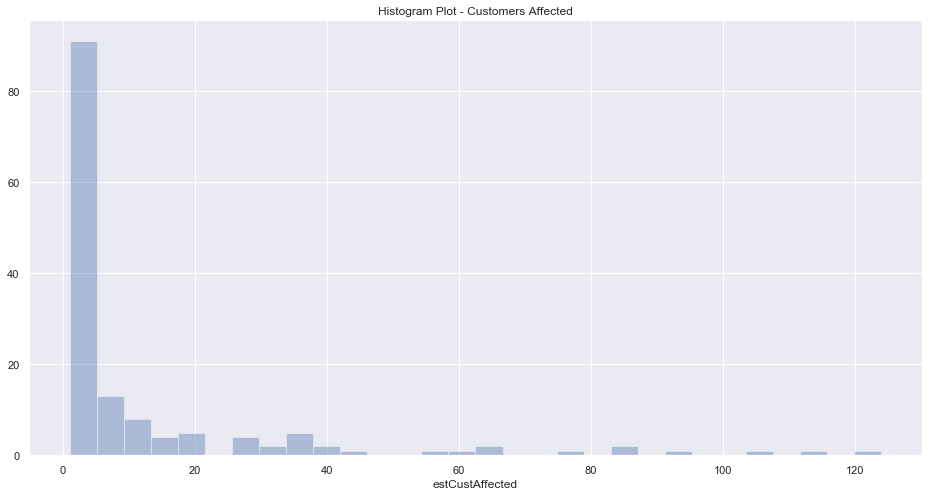

In [5]:
# 03A - Histogram plot

# Set plot size and title
plt.figure(figsize=(16, 8))
plt.title('Histogram Plot - Customers Affected')

# Create historgram for Annual Vehicle Miles Traveled
sns.distplot(df['estCustAffected'], kde=False) # `kde=False` turns off the default density estimate plot, try setting it to True !

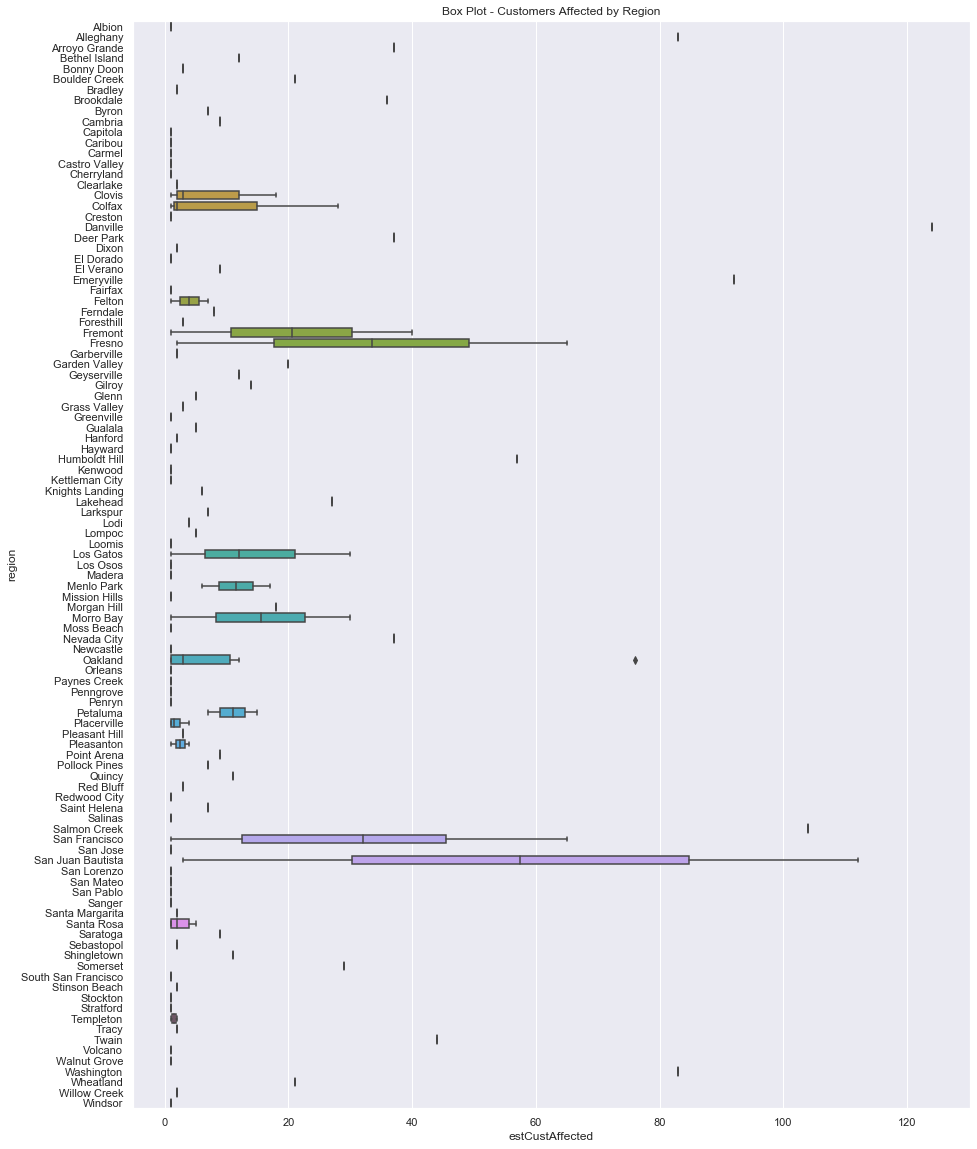

In [6]:
# 03B - Create box plots for routes' Annual Vehicle Miles Traveled, by county
# Set plot size and title
plt.figure(figsize=(15, 20))
plt.title('Box Plot - Customers Affected by Region')

# Create chart
ax = sns.boxplot(x="estCustAffected", y="region", data=df)

## Postscript: It's Okay to Experiment!
In Notebook you can always add new cells, or copy existing cells for tweaking -- want to try something new? Just create or copy/paste a new cell, experiment, tweak, break, fix, and edit as needed. Your original data is safe (e.g. in your CSV file, remember we first imported it into Python/Notebook), and you can always delete cells or start over by restarting the Python/Notebook kernel via the Kernel menu (warning: this will clear whatever you've computed in Notebook for this session, but it won't affect your Notebook code or the original data in your CSV file).

## Postscript: Searching for Help Online

Notebook, Python, Pandas, Numpy, Matplotlib, Seaborn... all of these have extensive resources online and Google is your friend.

An important tip for finding answers online is to use the right tech keyword with your question.

For example, you might ask *How do I sort my dataframe?* For this question, a good search would be "pandas sort dataframe". Here "pandas" is the 'right' tech keyword, whereas "notebook sort dataframe" may not return the best results.

The 'right' tech keyword is often the module you're working with, so if you're doing things with dataframes, it's pandas, if you're plotting, it's matplotlib or seaborn, etc.
